In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
signal_trees = TreeIter(list(map(Tree,fc.eightb.accstudies_no_pu.signal_list)))
signal_trees_pu = TreeIter(list(map(Tree,fc.eightb.accstudies.signal_list)))

# signal_trees.extend(kwargs=lambda tree : dict(n_ext_jet=tree.n_jet-tree.nfound_presel))
# signal_trees.extend(kwargs=eightb.reco_all)
# signal_trees.extend(kwargs=eightb.reco_res_all)

In [3]:
def get_point(label):
    label = label.split('_')
    return str((int(label[1]),int(label[3])))
signal_points = list(map(get_point,signal_trees.sample))

In [4]:
all_trees = TreeIter(list(signal_trees)+list(signal_trees_pu))

In [37]:
dout = "gen_studies/recojets/"

tree = signal_trees[-2]
tree_pu = signal_trees_pu[-2]

treeiter = TreeIter([tree,tree_pu])

In [6]:
all_trees.extend(kwargs=lambda t : dict(
    n_ext_jets = t.n_jet - t.nfound_presel
))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
varinfo.clear()

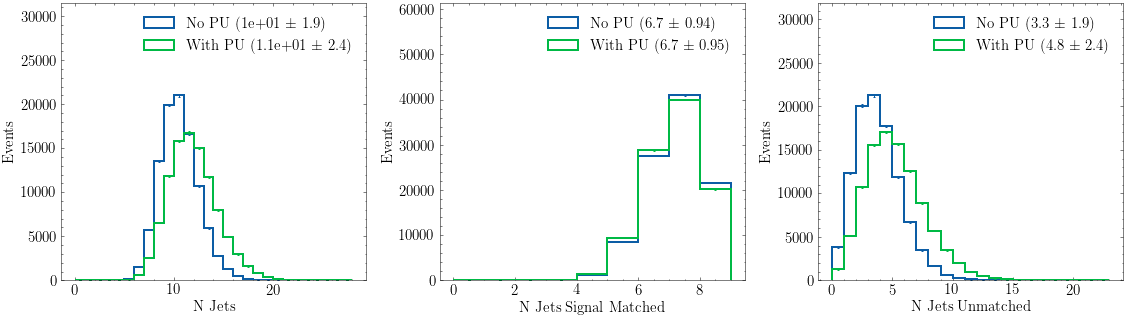

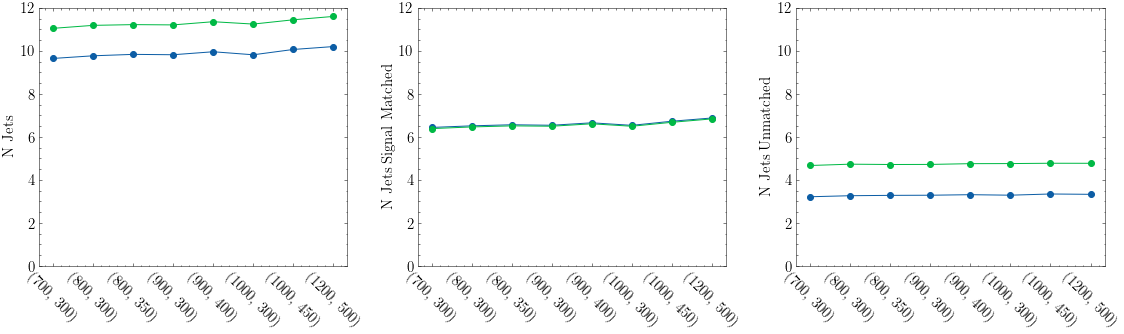

In [38]:
varlist = ['n_jet','nfound_all','n_ext_jets']
xlabels = ['N Jets','N Jets Signal Matched','N Jets Unmatched']
study.quick(
    treeiter,
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    s_colors=[None],
    dim=(-1,3),
    xlabels=xlabels
)

fig,axs = plt.subplots(ncols=3,figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylabel=xlabel,ylim=(0,12),figax=(fig,axs[i]))
    
fig.tight_layout()

In [16]:
all_trees.extend(kwargs = lambda t : dict(
    **{
        f'n_{wplabel}_pt':ak.sum((t.jet_pt > wp),axis=-1)
        for wp,wplabel in zip(jet_ptWP,wplabels)
    },
    **{
        f'n_matched_{wplabel}_pt':ak.sum((t.jet_signalId > -1) & (t.jet_pt > wp),axis=-1)
        for wp,wplabel in zip(jet_ptWP,wplabels)
    },
    **{
        f'n_unmatched_{wplabel}_pt':ak.sum((t.jet_signalId == -1) & (t.jet_pt > wp),axis=-1)
        for wp,wplabel in zip(jet_ptWP,wplabels)
    },
));

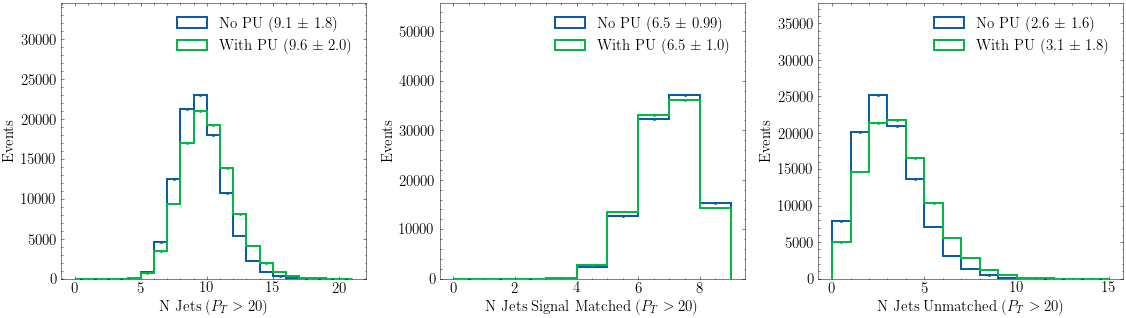

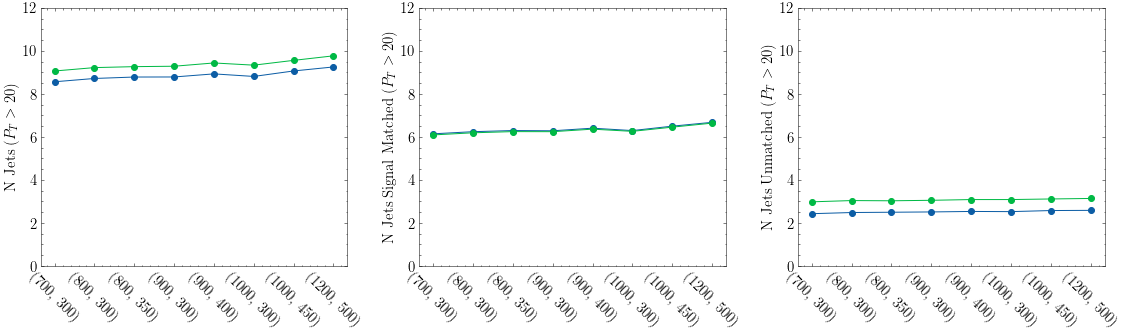

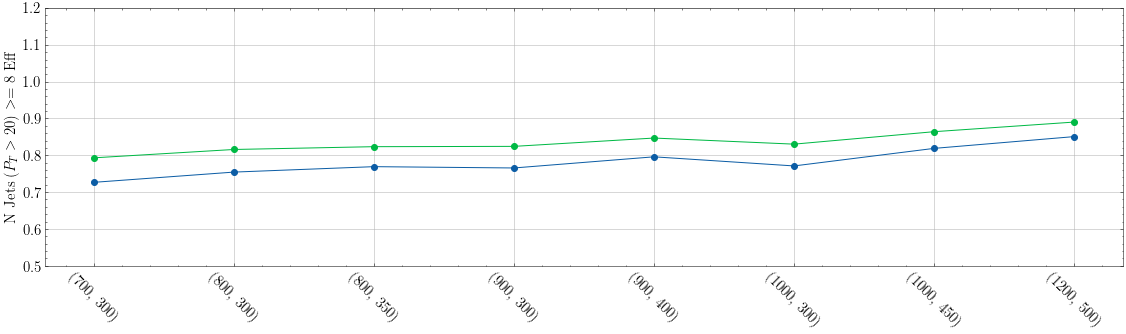

In [60]:
varlist = ['n_loose_pt','n_matched_loose_pt','n_unmatched_loose_pt']
xlabels = ['N Jets ($P_{T}>20$)','N Jets Signal Matched ($P_{T}>20$)','N Jets Unmatched ($P_{T}>20$)']
study.quick(
    treeiter,
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    xlabels=xlabels,
    s_colors=[None],
    dim=(-1,3),
)

fig,axs = plt.subplots(ncols=3,figsize=(16,5))
for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylim=(0,12),ylabel=xlabel,figax=(fig,axs[i]))    
fig.tight_layout()

fig,axs = plt.subplots(figsize=(16,5))
eff = np.array([ ak.sum(t[varlist[0]]>=8)/ak.count(t[varlist[0]]) for t in signal_trees ])
eff_pu = np.array([ ak.sum(t[varlist[0]]>=8)/ak.count(t[varlist[0]]) for t in signal_trees_pu ])
graph_multi(signal_points,[eff,eff_pu],xlabel=signal_points,ylim=(0.5,1.2),ylabel=f'{xlabels[0]} $>= 8$ Eff',grid=True,figax=(fig,axs))
fig.tight_layout()


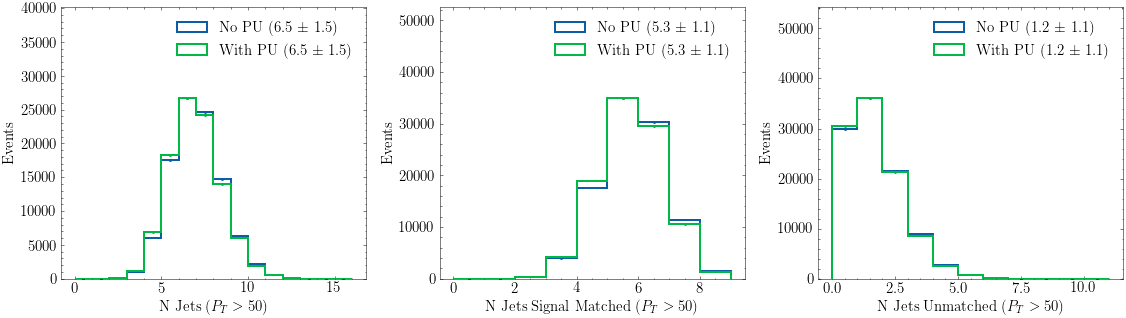

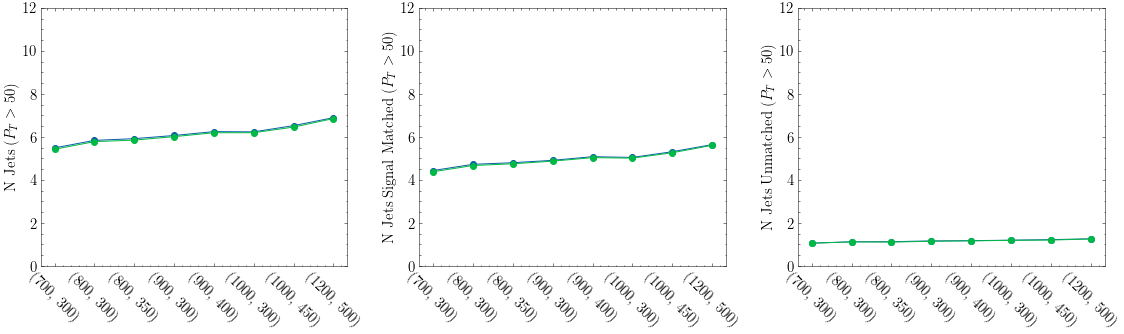

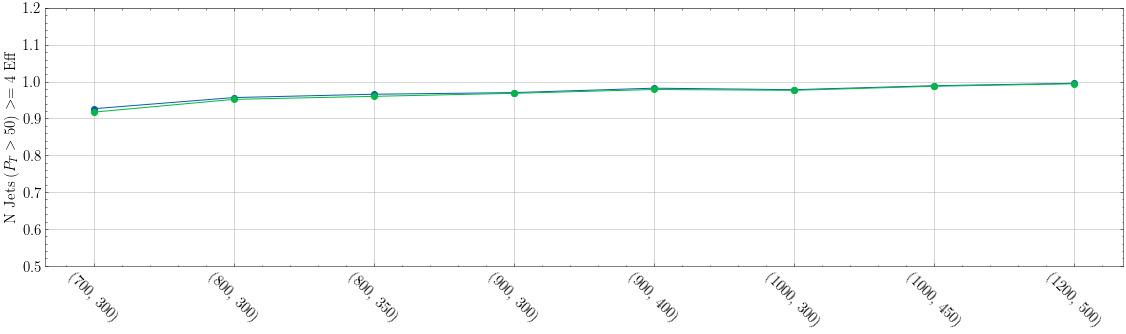

In [61]:

varlist = ['n_medium_pt','n_matched_medium_pt','n_unmatched_medium_pt']
xlabels = ['N Jets ($P_{T}>50$)','N Jets Signal Matched ($P_{T}>50$)','N Jets Unmatched ($P_{T}>50$)']
study.quick(
    [tree,tree_pu],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    xlabels=xlabels,
    s_colors=[None],
    dim=(-1,3),
)

fig,axs = plt.subplots(ncols=3,figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylim=(0,12),ylabel=xlabel,figax=(fig,axs[i]))
    
fig.tight_layout()


fig,axs = plt.subplots(figsize=(16,5))
eff = np.array([ ak.sum(t[varlist[0]]>=4)/ak.count(t[varlist[0]]) for t in signal_trees ])
eff_pu = np.array([ ak.sum(t[varlist[0]]>=4)/ak.count(t[varlist[0]]) for t in signal_trees_pu ])
graph_multi(signal_points,[eff,eff_pu],xlabel=signal_points,ylim=(0.5,1.2),ylabel=f'{xlabels[0]} $>= 4$ Eff',grid=True,figax=(fig,axs))
fig.tight_layout()

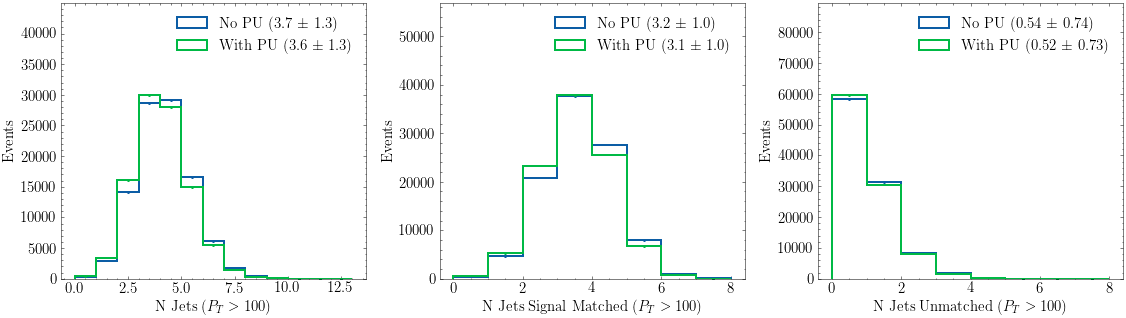

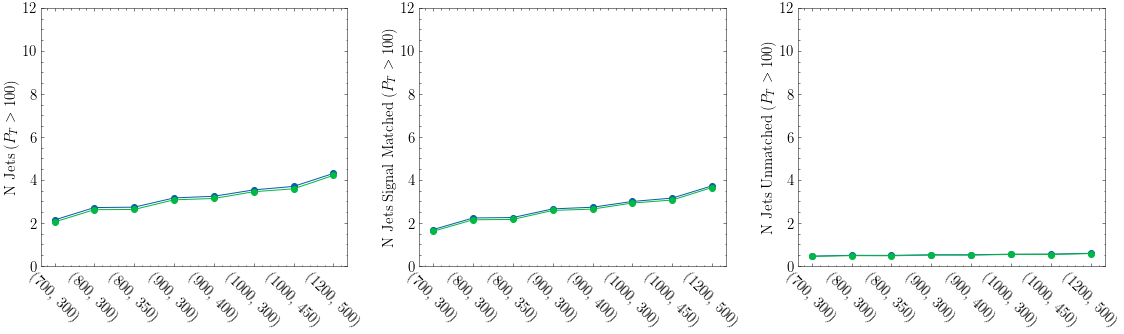

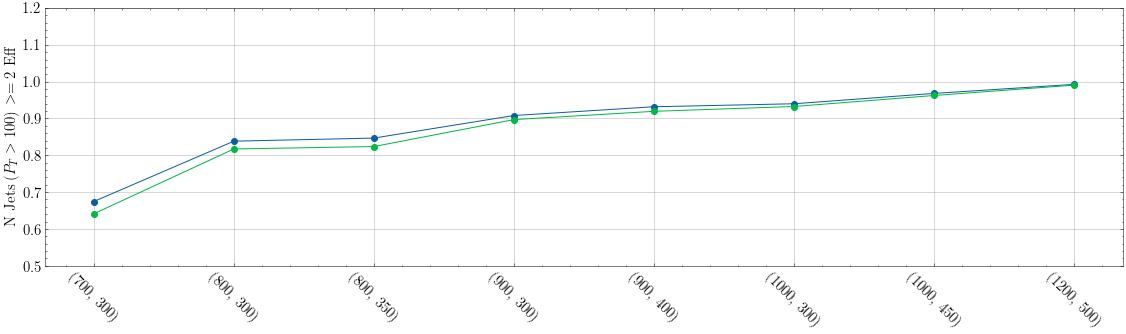

In [62]:
varlist = ['n_tight_pt','n_matched_tight_pt','n_unmatched_tight_pt']
xlabels = ['N Jets ($P_{T}>100$)','N Jets Signal Matched ($P_{T}>100$)','N Jets Unmatched ($P_{T}>100$)']
study.quick(
    [tree,tree_pu],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    xlabels=xlabels,
    s_colors=[None],
    dim=(-1,3),
)

fig,axs = plt.subplots(ncols=3,figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylim=(0,12),ylabel=xlabel,figax=(fig,axs[i]))
    
fig.tight_layout()


fig,axs = plt.subplots(figsize=(16,5))
eff = np.array([ ak.sum(t[varlist[0]]>=2)/ak.count(t[varlist[0]]) for t in signal_trees ])
eff_pu = np.array([ ak.sum(t[varlist[0]]>=2)/ak.count(t[varlist[0]]) for t in signal_trees_pu ])
graph_multi(signal_points,[eff,eff_pu],xlabel=signal_points,ylim=(0.5,1.2),ylabel=f'{xlabels[0]} $>= 2$ Eff',grid=True,figax=(fig,axs))
fig.tight_layout()